Data Types:
 Filename        object
Class Label      int64
f0             float64
f1             float64
f2             float64
                ...   
f195           float64
f196           float64
f197           float64
f198           float64
f199           float64
Length: 202, dtype: object

Missing Values:
 Filename       0
Class Label    0
f0             0
f1             0
f2             0
              ..
f195           0
f196           0
f197           0
f198           0
f199           0
Length: 202, dtype: int64

Percentage of Missing Values:
 Series([], dtype: float64)

Class Distribution:
 Class Label
1    1634
0    1055
2     564
Name: count, dtype: int64


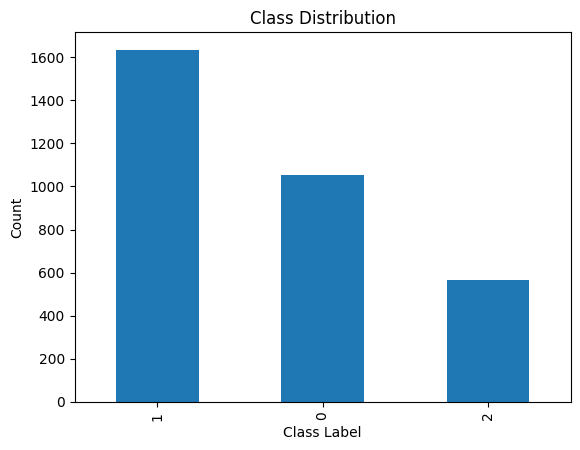

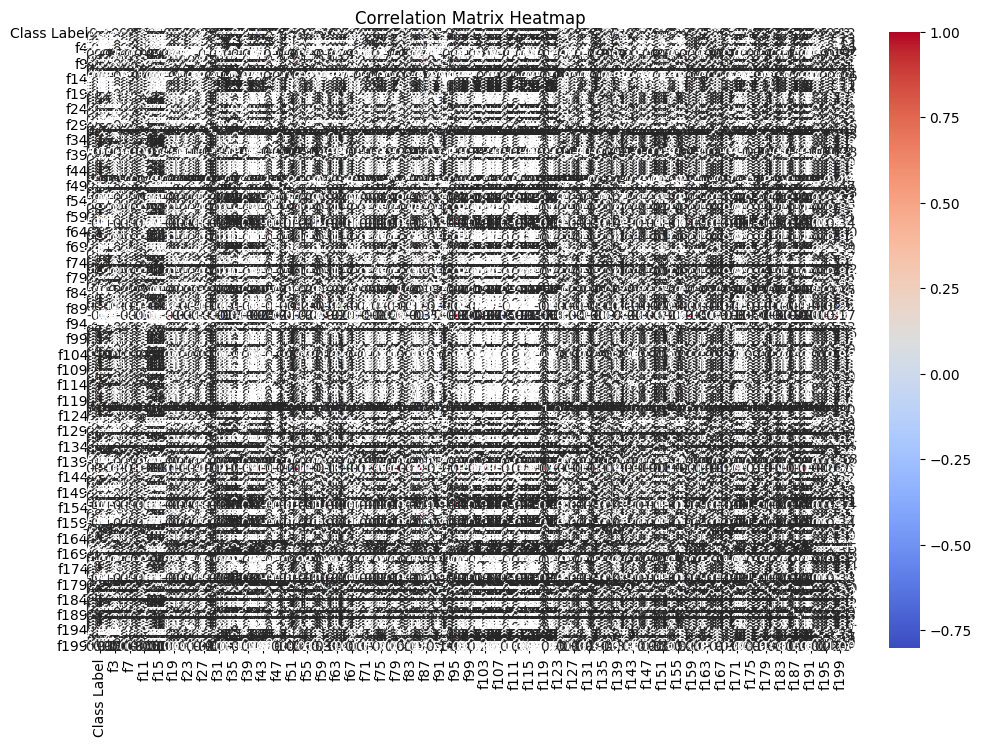


Matrix Rank: 175

Normalized Data Sample:
    Class Label        f0   f1   f2   f3   f4   f5        f6   f7        f8  \
0          1.0  0.064669  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.040959   
1          1.0  0.160217  0.0  0.0  0.0  0.0  0.0  0.224739  0.0  0.171410   
2          1.0  0.064161  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.042968   
3          1.0  0.081506  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.058093   
4          1.0  0.082483  0.0  0.0  0.0  0.0  0.0  0.171430  0.0  0.106704   

   ...      f190  f191      f192      f193      f194  f195  f196  f197  f198  \
0  ...  0.041971   0.0  0.040111  0.042329  0.035791   0.0   0.0   0.0   0.0   
1  ...  0.174819   0.0  0.167436  0.170408  0.179214   0.0   0.0   0.0   0.0   
2  ...  0.043856   0.0  0.042172  0.043888  0.038420   0.0   0.0   0.0   0.0   
3  ...  0.058768   0.0  0.057785  0.059281  0.052951   0.0   0.0   0.0   0.0   
4  ...  0.110830   0.0  0.108765  0.105597  0.120124   0.0   0.0   0.0   0.0   

      

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from numpy.linalg import matrix_rank
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
import time

# Function for loading the dataset
def load_data(file_path):
    """Load dataset from a CSV file."""
    return pd.read_csv(file_path)

# Function to check the data types of each column
def check_data_types(data):
    """Display data types of each column."""
    print("Data Types:\n", data.dtypes)

# Function to handle missing values
def handle_missing_values(data):
    """Handle missing values in the dataset."""
    # Check missing values
    missing_values = data.isnull().sum()
    print("\nMissing Values:\n", missing_values)
    missing_percent = (missing_values / len(data)) * 100
    print("\nPercentage of Missing Values:\n", missing_percent[missing_percent > 0])

    # Numerical columns - Mean Imputation
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

    # Categorical columns - Mode Imputation
    categorical_cols = data.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        data[col] = data[col].fillna(data[col].mode()[0])
    
    return data

# Function to plot class distribution of the target column
def plot_class_balance(data, target_col):
    """Plot the class balance of the target variable."""
    if target_col in data.columns:
        class_distribution = data[target_col].value_counts()
        print("\nClass Distribution:\n", class_distribution)
        class_distribution.plot(kind='bar')
        plt.title("Class Distribution")
        plt.xlabel("Class Label")
        plt.ylabel("Count")
        plt.show()

# Function to plot the correlation matrix of numerical columns
def plot_correlation_matrix(data, numeric_cols):
    """Plot the correlation matrix heatmap."""
    correlation_matrix = data[numeric_cols].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix Heatmap")
    plt.show()

# Function to compute the rank of the numerical data matrix
def compute_matrix_rank(data, numeric_cols):
    """Compute the rank of the numeric data matrix."""
    rank = matrix_rank(data[numeric_cols].values)
    print("\nMatrix Rank:", rank)
    return rank

# Function to normalize the data using MinMax scaling
def normalize_data(data, numeric_cols):
    """Normalize numeric columns using Min-Max scaling."""
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data[numeric_cols])
    normalized_df = pd.DataFrame(normalized_data, columns=numeric_cols)
    print("\nNormalized Data Sample:\n", normalized_df.head())
    return normalized_df

# Classifier evaluation function
def evaluate_classifiers(X, y):
    """Evaluate different classifiers for underfitting and overfitting."""
    # Convert non-numeric columns to numeric using LabelEncoder
    non_numeric_columns = X.select_dtypes(include=['object']).columns
    for col in non_numeric_columns:
        label_encoder = LabelEncoder()
        X[col] = label_encoder.fit_transform(X[col])

    # Standardize the feature set
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

    # Initialize classifiers
    classifiers = {
        "kNN": KNeighborsClassifier(n_neighbors=5),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "SVM": SVC(probability=True, random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Naïve-Bayes": GaussianNB()
    }

    # Evaluate classifiers for train and test performance, including timing
    fit_results = []

    for name, clf in classifiers.items():
        # Record training time
        start_train_time = time.time()
        clf.fit(X_train, y_train)
        end_train_time = time.time()
        
        # Record classification time for training and test sets
        start_train_pred_time = time.time()
        y_train_pred = clf.predict(X_train)
        end_train_pred_time = time.time()
        
        start_test_pred_time = time.time()
        y_test_pred = clf.predict(X_test)
        end_test_pred_time = time.time()

        # Calculate metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')

        # Calculate timing results
        train_time = end_train_time - start_train_time
        train_pred_time = end_train_pred_time - start_train_pred_time
        test_pred_time = end_test_pred_time - start_test_pred_time

        # Determine fit status
        if train_accuracy < 0.7 and test_accuracy < 0.7:  # Both performances are poor
            fit_status = "Underfit"
        elif train_accuracy - test_accuracy > 0.2:  # Large gap between train and test
            fit_status = "Overfit"
        else:
            fit_status = "Regular Fit"  # Balanced performance on train and test

        # Store results
        fit_results.append({
            "Classifier": name,
            "Train Accuracy": train_accuracy,
            "Test Accuracy": test_accuracy,
            "Train F1-Score": train_f1,
            "Test F1-Score": test_f1,
            "Fit Status": fit_status,
            "Train Time (s)": train_time,
            "Train Prediction Time (s)": train_pred_time,
            "Test Prediction Time (s)": test_pred_time
        })

    # Create and display results DataFrame
    fit_results_df = pd.DataFrame(fit_results)
    print("\nFit and Timing Analysis Results:")
    print(fit_results_df)

    # Optional: Save results to CSV
    fit_results_df.to_csv("fit_and_timing_analysis_results.csv", index=False)

# Main function to run the data analysis
def main():
    # Replace with the path to your dataset
    file_path = r"C:\Users\Admin\Downloads\Custom_CNN_Features.csv"
    data = load_data(file_path)

    # Step 1: Check Data Types
    check_data_types(data)

    # Step 2: Handle Missing Values
    data = handle_missing_values(data)

    # Step 3: Plot Class Balance
    target_col = 'Class Label'  # Replace with the actual target column name
    plot_class_balance(data, target_col)

    # Step 4: Plot Correlation Matrix
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    plot_correlation_matrix(data, numeric_cols)

    # Step 5: Compute Matrix Rank
    compute_matrix_rank(data, numeric_cols)

    # Step 6: Normalize Data
    normalize_data(data, numeric_cols)

    # Step 7: Classifier Evaluation
    X = data.drop(target_col, axis=1)  # Features
    y = data[target_col]  # Target
    evaluate_classifiers(X, y)

if __name__ == "__main__":
    main()
